In [2]:
# data=> Rice_Cammeo_Osmancik.xlsx

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_excel('Rice_Cammeo_Osmancik.xlsx')
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


# steps

In [ ]:
'''
1. load the data/ import data
2. data cleaning - missing values
3. EDA => Exploratory Data Analysis
4. check for outliers and removal
5. data balancing/ resampling
6. feature scaling/Feature Selection/Dimensionality Reduction
7. cross validation
8. find the suitable algorithm
9. model building
10. predictions, performance evaluation
11. deployment (optional)
'''

In [11]:
df.isnull().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Eccentricity         0
Convex_Area          0
Extent               0
Class                0
dtype: int64

In [13]:
df.dtypes

Area                   int64
Perimeter            float64
Major_Axis_Length    float64
Minor_Axis_Length    float64
Eccentricity         float64
Convex_Area            int64
Extent               float64
Class                 object
dtype: object

In [15]:
pd.set_option('display.max_columns', None)

In [17]:
x = df.drop('Class', axis = 1)
y = df['Class']

In [21]:
y.value_counts()

Class
Osmancik    2180
Cammeo      1630
Name: count, dtype: int64

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [29]:
x.columns

Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Eccentricity', 'Convex_Area', 'Extent'],
      dtype='object')

In [33]:
x.shape

(3810, 7)

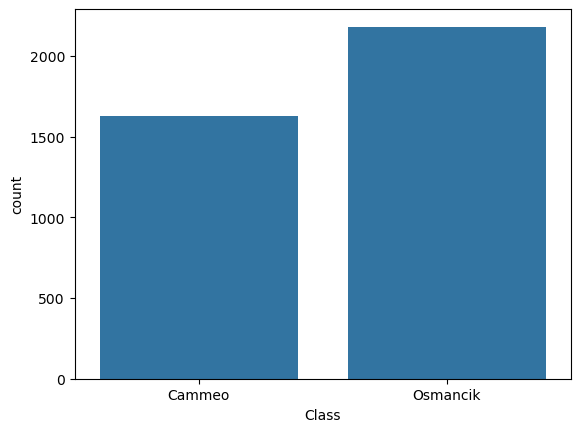

In [27]:
sns.countplot(x = y);

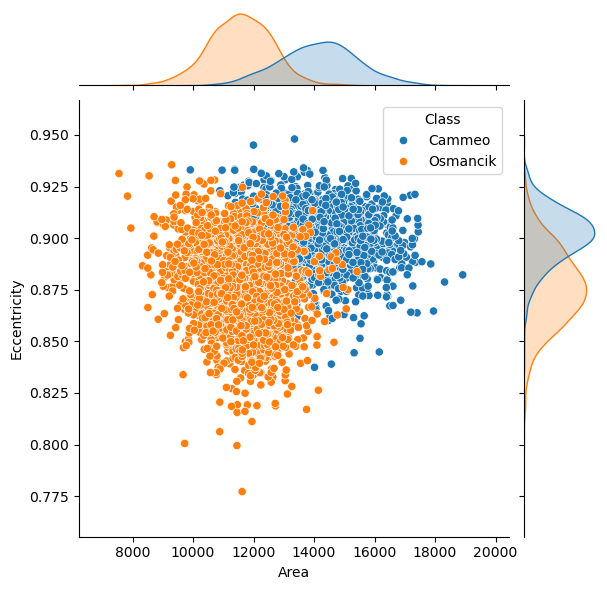

In [31]:
sns.jointplot(x = 'Area', y = 'Eccentricity', data = df,
             hue = 'Class');

In [35]:
one = x.iloc[:, 0:4]
one['Class'] = y

two = x.iloc[:, 4:]
two['Class'] = y

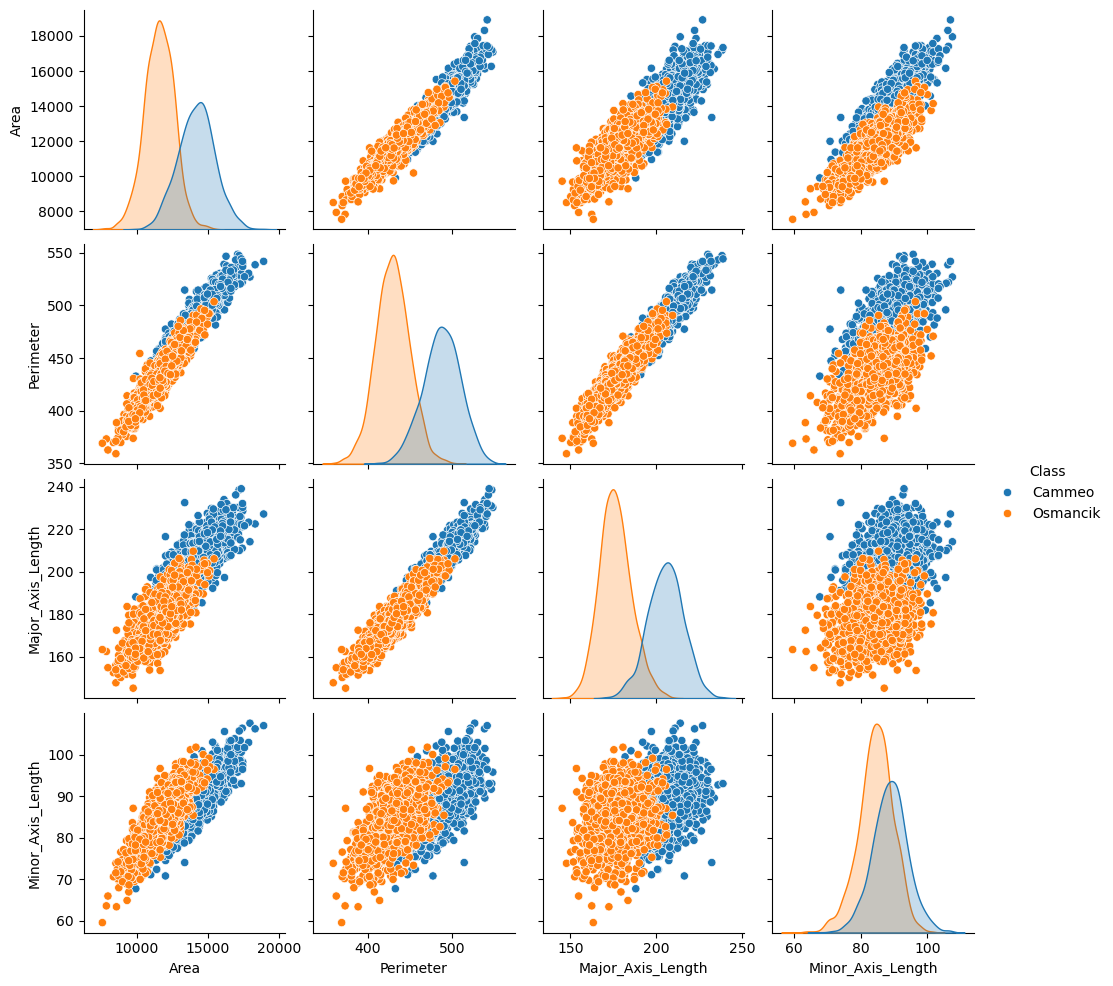

In [37]:
sns.pairplot(one, hue = 'Class');

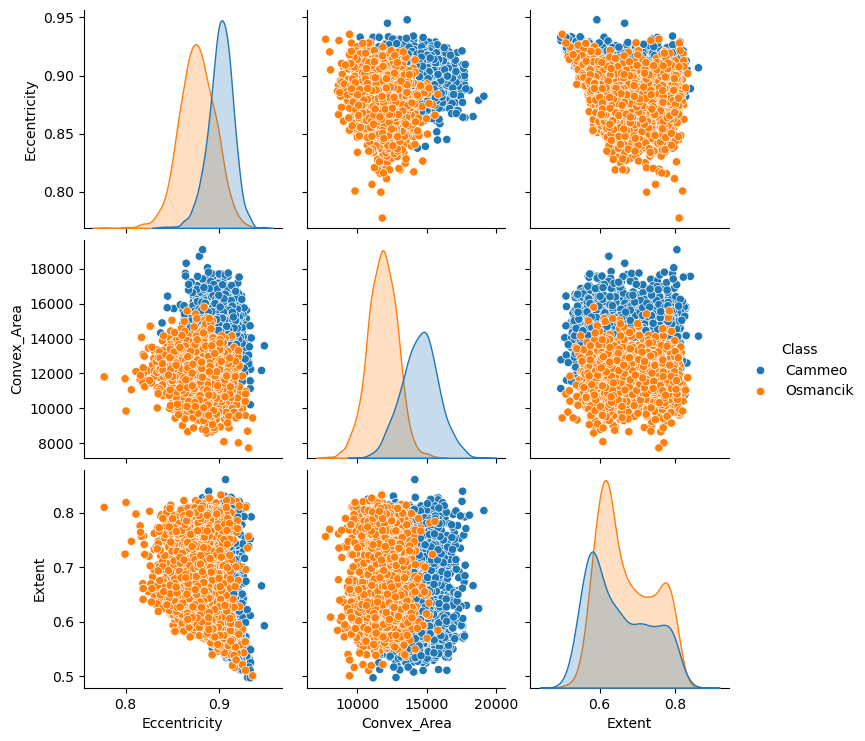

In [39]:
sns.pairplot(two, hue = 'Class');

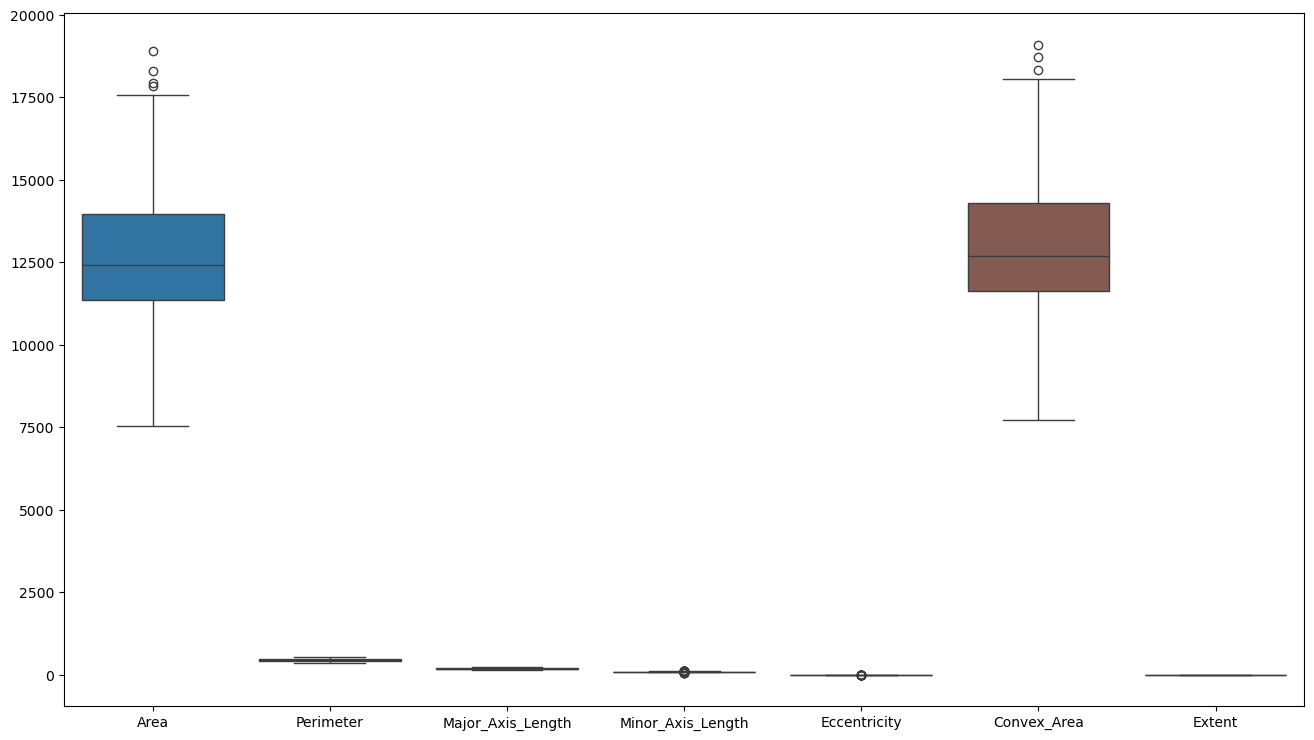

In [43]:
plt.figure(figsize=(16,9))
sns.boxplot(data = x);

In [45]:
x.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
count,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000
mean,12667.727559,454.239180,188.776222,86.313750,0.886871,12952.496850,0.661934
std,1732.367706,35.597081,17.448679,5.729817,0.020818,1776.972042,0.077239
min,7551.000000,359.100006,145.264465,59.532406,0.777233,7723.000000,0.497413
25%,11370.500000,426.144753,174.353855,82.731695,0.872402,11626.250000,0.598862
50%,12421.500000,448.852493,185.810059,86.434647,0.889050,12706.500000,0.645361
75%,13950.000000,483.683746,203.550438,90.143677,0.902588,14284.000000,0.726562
max,18913.000000,548.445984,239.010498,107.542450,0.948007,19099.000000,0.861050


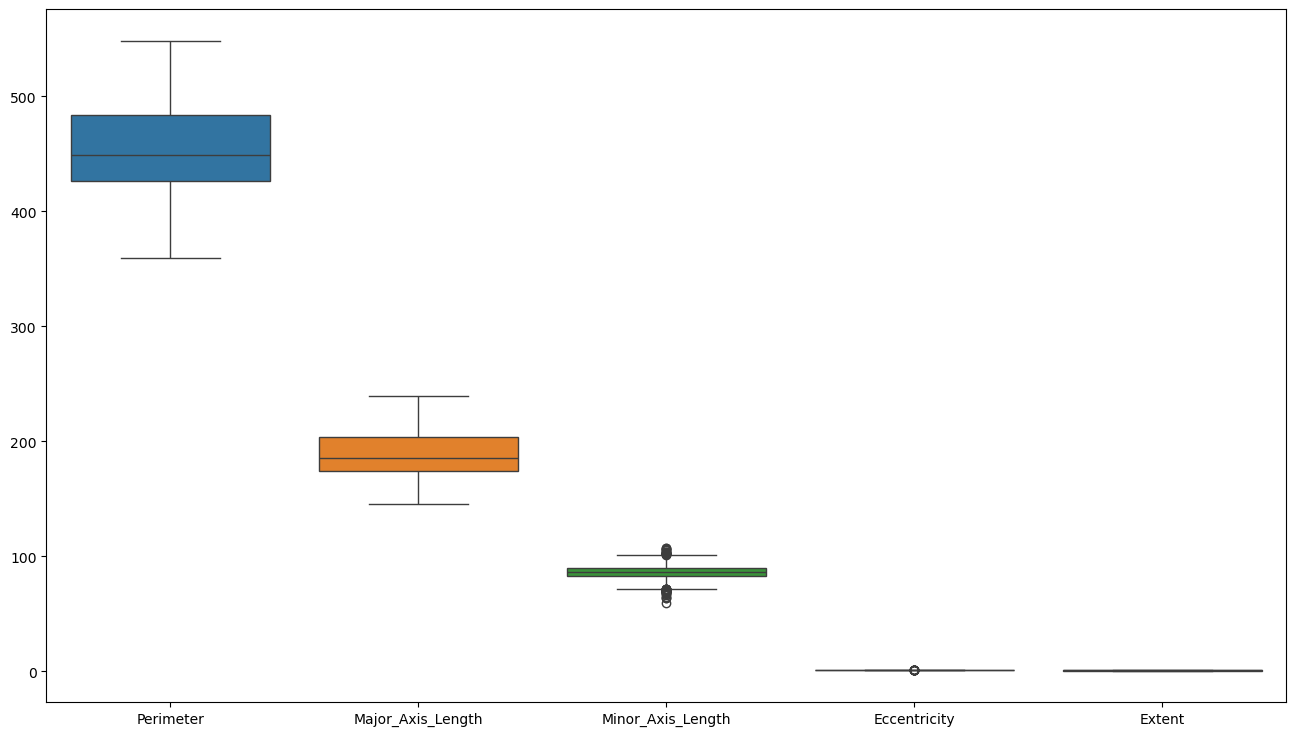

In [47]:
plt.figure(figsize=(16,9))
sns.boxplot(data = x.drop(['Area', 'Convex_Area'], axis = 1));

#### outlier removal

In [50]:
from sklearn.ensemble import IsolationForest

In [54]:
iso = IsolationForest(contamination= 0.05, random_state= 0)

In [56]:
clean = iso.fit_predict(x)

In [66]:
clean;

In [60]:
x_clean = x[clean == 1]
y_clean = y[clean == 1]

In [62]:
x_clean.shape

(3619, 7)

In [64]:
y_clean.shape

(3619,)

In [68]:
y_clean

1         Cammeo
2         Cammeo
3         Cammeo
4         Cammeo
5         Cammeo
          ...   
3805    Osmancik
3806    Osmancik
3807    Osmancik
3808    Osmancik
3809    Osmancik
Name: Class, Length: 3619, dtype: object

In [70]:
y_clean.value_counts()

Class
Osmancik    2090
Cammeo      1529
Name: count, dtype: int64

#### resampling

In [93]:
# !pip install imbalanced-learn

In [83]:
from imblearn.over_sampling import SMOTE

In [85]:
smo = SMOTE(random_state=0)

In [87]:
x_res, y_res = smo.fit_resample(x_clean, y_clean)

In [89]:
x_res.shape

(4180, 7)

In [91]:
y_res.value_counts()

Class
Cammeo      2090
Osmancik    2090
Name: count, dtype: int64

### Feature Selection

In [110]:
from sklearn.feature_selection import SelectKBest, chi2

In [112]:
skb = SelectKBest(k = 5, score_func = chi2)

In [114]:
skb.fit(x_res, y_res)

SelectKBest(k=5, score_func=<function chi2 at 0x7bb68c6cbf60>)

In [116]:
skb.get_support()

array([ True,  True,  True,  True, False,  True, False])

In [118]:
x = x_res.iloc[:, skb.get_support()]

In [120]:
x.shape

(4180, 5)

In [122]:
x.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area
count,4180.000000,4180.000000,4180.000000,4180.000000,4180.000000
mean,12823.785407,457.942684,190.625698,86.582758,13114.061962
std,1593.647869,33.425394,16.636131,5.031819,1636.275391
min,9335.000000,384.459991,155.124481,70.725792,9536.000000
25%,11549.000000,429.690750,175.871456,83.201878,11814.250000
50%,12668.000000,455.768889,190.699631,86.665165,12939.000000
75%,14146.750000,486.591176,204.874571,90.174334,14457.500000
max,16603.000000,530.335022,227.502335,101.026207,16922.000000


#### Feature Scaling

In [125]:
from sklearn.preprocessing import MinMaxScaler
sca = MinMaxScaler()
x_scaled = sca.fit_transform(x)

#### cross validation

In [128]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_res,
                                                   random_state=0,
                                                   stratify= y_res)

In [132]:
'''
random forest
logistic
knn

with hyper parameter tuning
''';


#### Random Forest

In [139]:
from sklearn.ensemble import RandomForestClassifier

In [137]:
param = {
    'n_estimators': [100, 150, 200],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 3]
}

In [141]:
from sklearn.model_selection import GridSearchCV
rf_grid = GridSearchCV(estimator= RandomForestClassifier(),
                      param_grid= param,
                      scoring= 'accuracy',
                      cv = 3)

In [143]:
rf_grid.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 3],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy')

In [151]:
rf_grid.best_estimator_

RandomForestClassifier(max_features='log2')

In [145]:
# evaluate

y_pred = rf_grid.predict(x_test)

In [147]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report

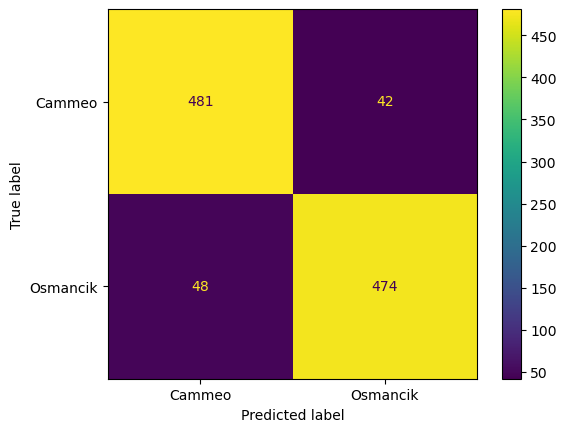

In [149]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [155]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Cammeo       0.91      0.92      0.91       523
    Osmancik       0.92      0.91      0.91       522

    accuracy                           0.91      1045
   macro avg       0.91      0.91      0.91      1045
weighted avg       0.91      0.91      0.91      1045



In [157]:
accuracy_score(y_test, y_pred)

0.9138755980861244

#### Serialize the model

In [162]:
import joblib

In [164]:
# dump/ save the model
joblib.dump(rf_grid, 'rf_classifier.joblib')

# dump scaler object
joblib.dump(sca, 'scaler.joblib')

['scaler.joblib']

In [166]:
# load the model

clf = joblib.load('rf_classifier.joblib')
scaler = joblib.load('scaler.joblib')

In [172]:
x.head(1)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area
0,14656,494.311005,206.020065,91.730972,15072


In [174]:
# predict

new = [[12341, 453.21, 203.043, 97.473, 16032]]

In [176]:
clf.predict(scaler.transform(new))

array(['Osmancik'], dtype=object)